In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
data = pd.read_csv('cleaned_games.csv')

In [3]:
data.head()


,Unnamed: 0,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,0,20200,Galactic Bowling,2008-10-21,10000.0,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,1,655370,Train Bandit,2017-10-12,10000.0,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,2,1732930,Jolt Project,2021-11-17,10000.0,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",No tags available for this game,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,3,1355720,Henosis™,2020-07-23,10000.0,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,4,1139950,Two Weeks in Painland,2020-02-03,10000.0,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [4]:
data.drop(columns=['Unnamed: 0','AppID', 'User score'], inplace = True)

In [5]:
print(data.shape)

(85075, 31)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85075 entries, 0 to 85074
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        85075 non-null  object 
 1   Release date                85075 non-null  object 
 2   Estimated owners            85075 non-null  float64
 3   Peak CCU                    85075 non-null  int64  
 4   Required age                85075 non-null  int64  
 5   Price                       85075 non-null  float64
 6   DLC count                   85075 non-null  int64  
 7   About the game              85075 non-null  object 
 8   Supported languages         85075 non-null  object 
 9   Full audio languages        85075 non-null  object 
 10  Header image                85075 non-null  object 
 11  Support email               85075 non-null  object 
 12  Windows                     85075 non-null  bool   
 13  Mac                         850

### Need to convert the data back to the proper type due to csv and dataframe conversion

In [7]:
data['Release date'] = pd.to_datetime(data['Release date'])
data[['Name', 'About the game', 'Supported languages','Full audio languages', 'Header image','Support email','Developers','Publishers','Categories','Genres','Tags','Screenshots','Movies']] \
    = data[['Name', 'About the game','Supported languages','Full audio languages','Header image','Support email','Developers','Publishers','Categories','Genres','Tags','Screenshots','Movies']].astype('string')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85075 entries, 0 to 85074
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Name                        85075 non-null  string        
 1   Release date                85075 non-null  datetime64[ns]
 2   Estimated owners            85075 non-null  float64       
 3   Peak CCU                    85075 non-null  int64         
 4   Required age                85075 non-null  int64         
 5   Price                       85075 non-null  float64       
 6   DLC count                   85075 non-null  int64         
 7   About the game              85075 non-null  string        
 8   Supported languages         85075 non-null  string        
 9   Full audio languages        85075 non-null  string        
 10  Header image                85075 non-null  string        
 11  Support email               85075 non-null  string    

In [9]:
data.isna().sum()

Name                          0
Release date                  0
Estimated owners              0
Peak CCU                      0
Required age                  0
Price                         0
DLC count                     0
About the game                0
Supported languages           0
Full audio languages          0
Header image                  0
Support email                 0
Windows                       0
Mac                           0
Linux                         0
Metacritic score              0
Positive                      0
Negative                      0
Achievements                  0
Recommendations               0
Average playtime forever      0
Average playtime two weeks    0
Median playtime forever       0
Median playtime two weeks     0
Developers                    0
Publishers                    0
Categories                    0
Genres                        0
Tags                          0
Screenshots                   0
Movies                        0
dtype: i

In [10]:
data.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Name,85075,84347,Shadow of the Tomb Raider: Definitive Edition,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Release date,85075,NaN,NaN,NaN,2020-04-28 20:28:55.786071040,1997-06-30 00:00:00,2018-07-01 00:00:00,2020-12-18 00:00:00,2022-08-18 00:00:00,2025-04-14 00:00:00,NaN
Estimated owners,85075.0,NaN,NaN,NaN,85911.43109,0.0,10000.0,10000.0,10000.0,150000000.0,1027921.687198
Peak CCU,85075.0,NaN,NaN,NaN,134.916391,0.0,0.0,0.0,1.0,872138.0,5404.437463
Required age,85075.0,NaN,NaN,NaN,0.312677,0.0,0.0,0.0,0.0,21.0,2.254359
Price,85075.0,NaN,NaN,NaN,7.195033,0.0,0.99,4.49,9.99,999.98,12.363846
DLC count,85075.0,NaN,NaN,NaN,0.543567,0.0,0.0,0.0,0.0,2366.0,13.723477
About the game,85075,81080,playtest is the process by which a game design...,3378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Supported languages,85075,11304,['English'],43531,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Full audio languages,85075,2240,[],49447,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 2000x2000 with 0 Axes>

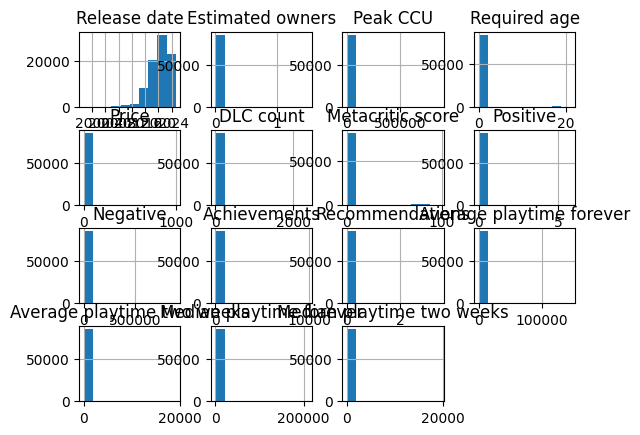

In [11]:
plt.figure(figsize=(20,20))
data.hist();

<Axes: >

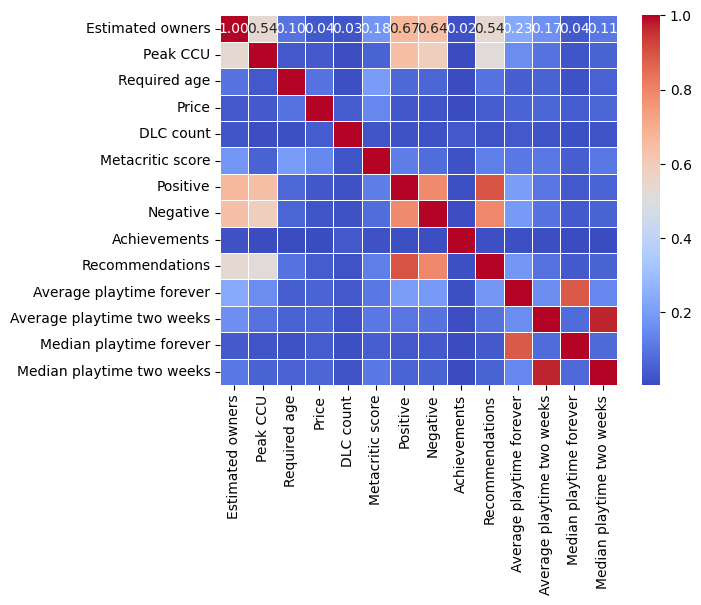

In [12]:
numeric_data = data.select_dtypes(include=[float, int])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [13]:
numeric_vars = data.select_dtypes(include=[np.number]).columns
print('Numeric Columns:', numeric_vars)
print(len(numeric_vars))
cat_vars = data.select_dtypes(include=['string','datetime']).columns
print('Categorical Columns:', cat_vars)
print(len(cat_vars))
print(len(data.columns))


Numeric Columns: Index(['Estimated owners', 'Peak CCU', 'Required age', 'Price', 'DLC count',
       'Metacritic score', 'Positive', 'Negative', 'Achievements',
       'Recommendations', 'Average playtime forever',
       'Average playtime two weeks', 'Median playtime forever',
       'Median playtime two weeks'],
      dtype='object')
14
Categorical Columns: Index(['Name', 'Release date', 'About the game', 'Supported languages',
       'Full audio languages', 'Header image', 'Support email', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')
14
31


/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


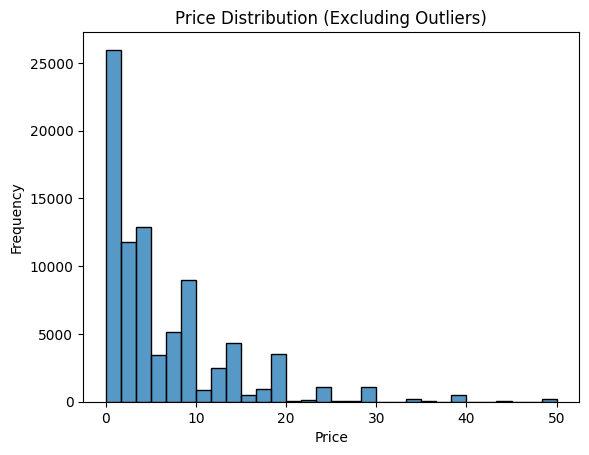

In [14]:
filtered_prices = data[data['Price'] <= data['Price'].quantile(0.99)]['Price']
sns.histplot(filtered_prices, bins=30)
plt.title('Price Distribution (Excluding Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


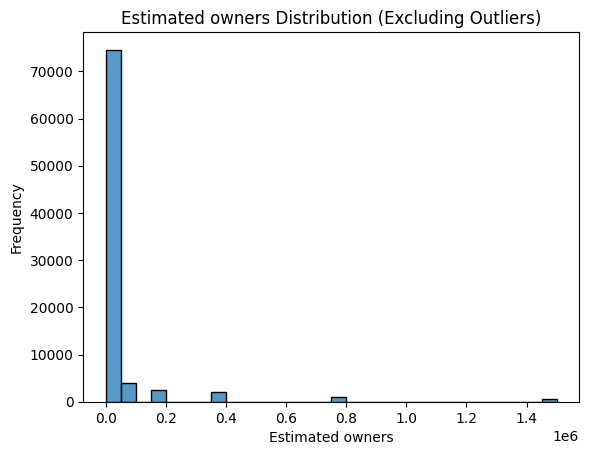

/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


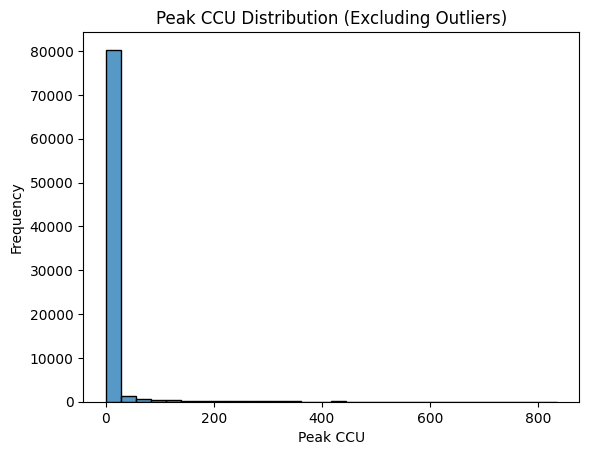

/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


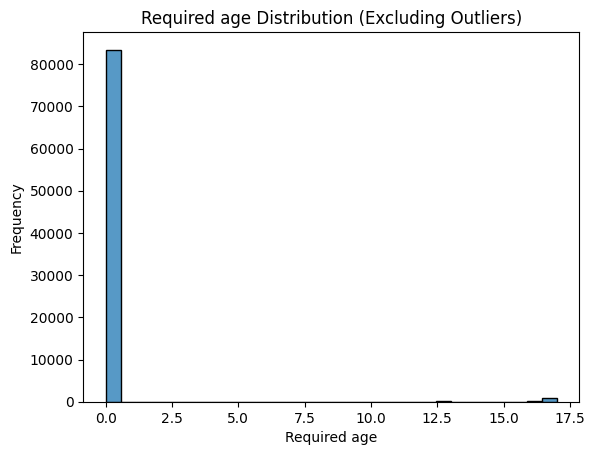

/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


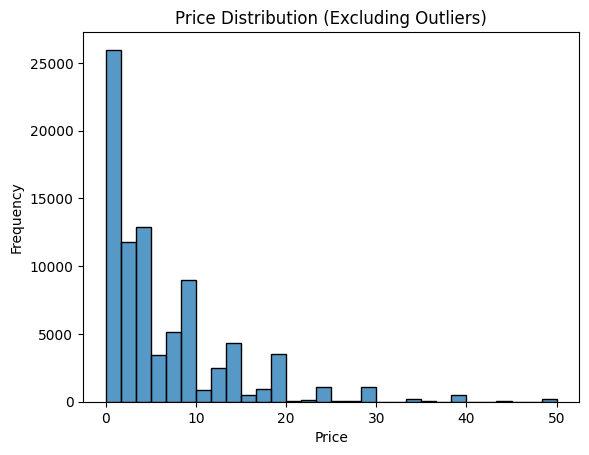

/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


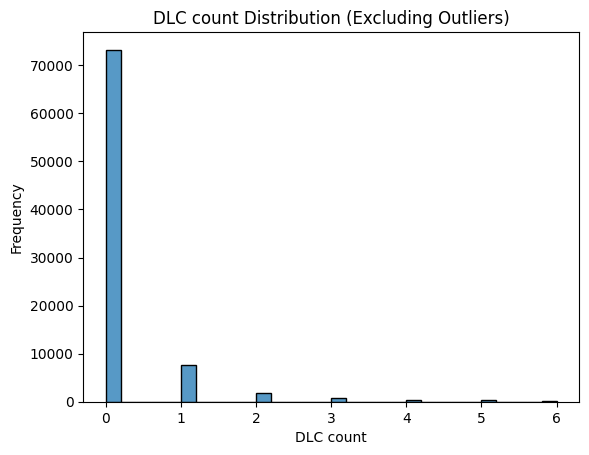

/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


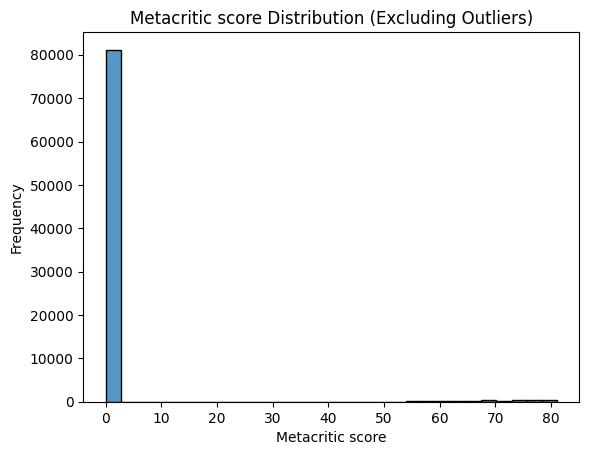

/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


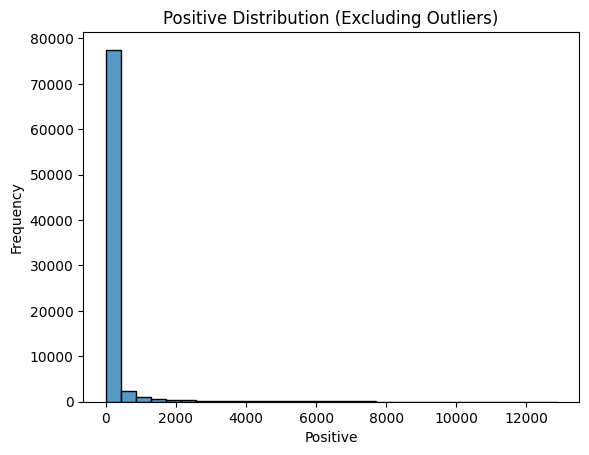

/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


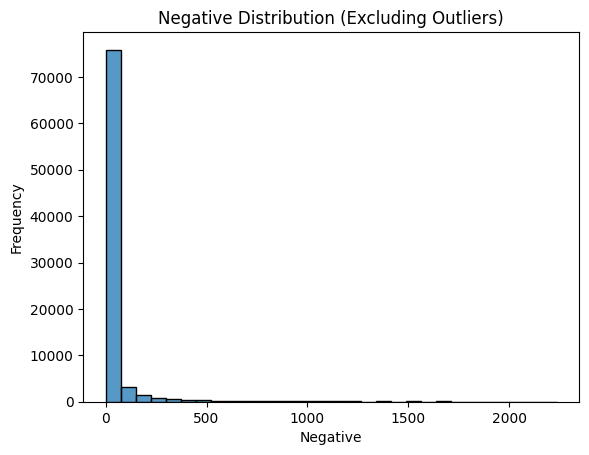

/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


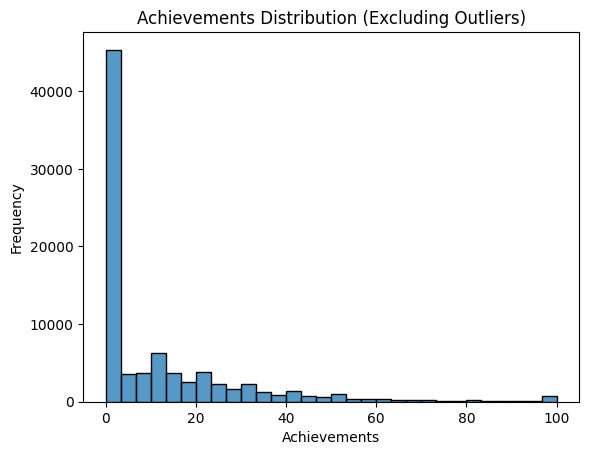

/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


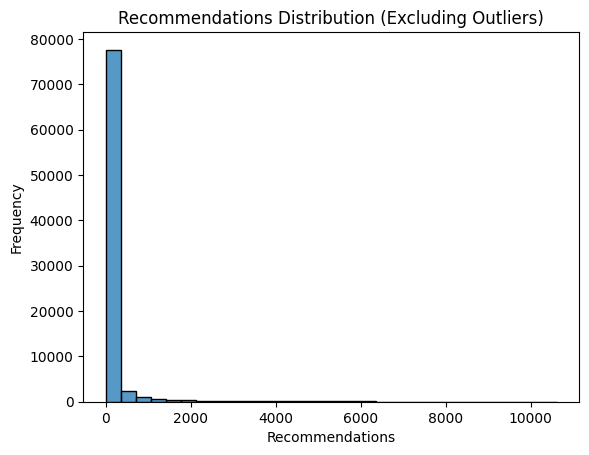

/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


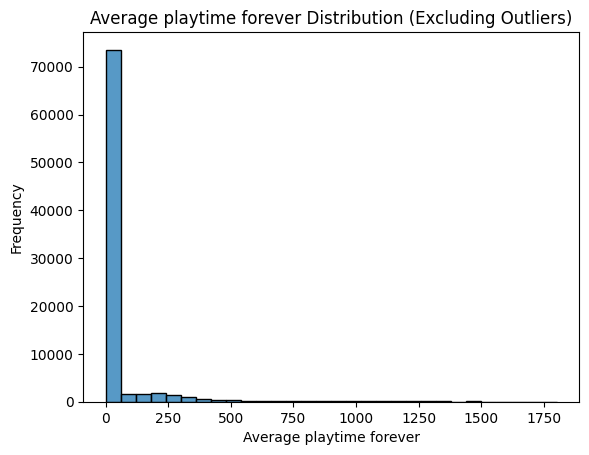

/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


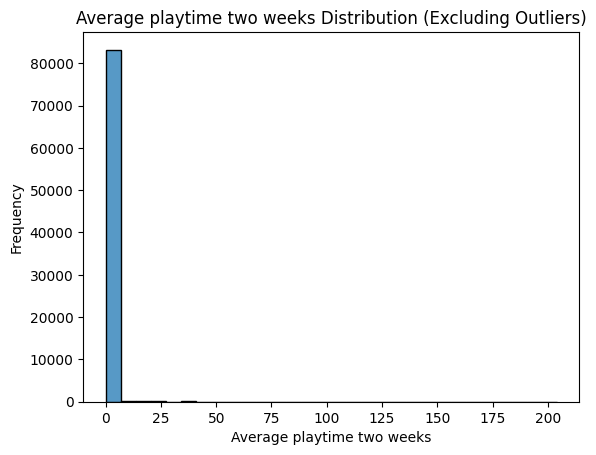

/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


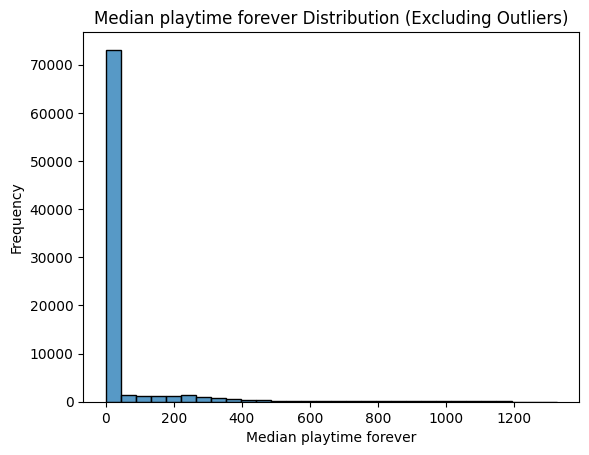

/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


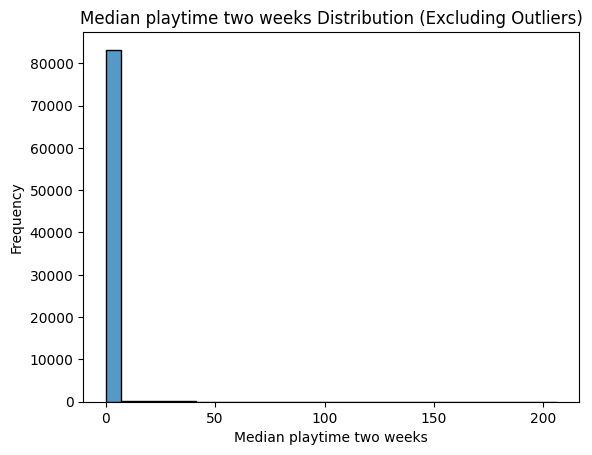

In [15]:
for var in numeric_vars:
    filtered_var = data[data[var] <= data[var].quantile(0.99)][var]
    sns.histplot(filtered_var, bins=30)
    plt.title(var + ' Distribution (Excluding Outliers)')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()


In [16]:
data.groupby("Name").agg({"Estimated owners":"sum"}).reset_index().sort_values("Estimated owners",ascending=False).head(5)

,Name,Estimated owners
19451,Dota 2,150000000.0
46555,New World,75000000.0
49458,PUBG: BATTLEGROUNDS,75000000.0
67579,Team Fortress 2,75000000.0
14299,Counter-Strike: Global Offensive,75000000.0


In [17]:
data.groupby("Name").agg({"Average playtime two weeks":"sum"}).reset_index().sort_values("Average playtime two weeks",ascending=False).head(5)

,Name,Average playtime two weeks
3431,America's Army: Proving Grounds,19159
27060,GRID,10996
24370,Fe,10995
46142,Need for Speed™ Payback,10994
51403,Plants vs. Zombies: Battle for Neighborville™,10993


In [18]:
data.groupby("Name").agg({"Median playtime two weeks":"sum"}).reset_index().sort_values("Median playtime two weeks",ascending=False).head(5)

,Name,Median playtime two weeks
3431,America's Army: Proving Grounds,19159
27060,GRID,10996
75287,Unravel Two,10995
24370,Fe,10995
46142,Need for Speed™ Payback,10994


In [19]:
data.groupby("Name").agg({"Median playtime forever":"sum"}).reset_index().sort_values("Median playtime forever",ascending=False).head(5)

,Name,Median playtime forever
22139,Energy Engine PC Live Wallpaper,208473
8924,Boom 3D,145727
55375,Relive,136629
60928,Sisyphus Reborn,136291
79885,YoloMouse,114016


In [20]:
data.groupby("Name").agg({"Average playtime forever":"sum"}).reset_index().sort_values("Average playtime forever",ascending=False).head(5)

,Name,Average playtime forever
8924,Boom 3D,145727
22139,Energy Engine PC Live Wallpaper,104238
82262,副作用之瞳-Tlicolity Eyes-,90351
17609,Defense Clicker,76068
55375,Relive,68357


In [21]:
data.groupby("Name").agg({"Recommendations":"sum"}).reset_index().sort_values("Recommendations",ascending=False).head(5)

,Name,Recommendations
72876,Tom Clancy's Rainbow Six® Siege,4497818
14299,Counter-Strike: Global Offensive,3441592
49458,PUBG: BATTLEGROUNDS,1616422
28961,Grand Theft Auto V,1247051
59872,Shadow of the Tomb Raider: Definitive Edition,973567


In [22]:
data.groupby("Name").agg({"Positive":"sum"}).reset_index().sort_values("Positive",ascending=False).head(5)

,Name,Positive
14299,Counter-Strike: Global Offensive,5764420
72876,Tom Clancy's Rainbow Six® Siege,2179536
19451,Dota 2,1477153
28961,Grand Theft Auto V,1171197
49458,PUBG: BATTLEGROUNDS,1154655


In [23]:
data.groupby("Name").agg({"Negative":"sum"}).reset_index().sort_values("Negative",ascending=False).head(5)

,Name,Negative
49458,PUBG: BATTLEGROUNDS,895978
14299,Counter-Strike: Global Offensive,766677
72876,Tom Clancy's Rainbow Six® Siege,395207
19451,Dota 2,300437
28961,Grand Theft Auto V,210154


In [24]:
data['Genres']

0                       Casual,Indie,Sports
1                              Action,Indie
2           Action,Adventure,Indie,Strategy
3                    Adventure,Casual,Indie
4                           Adventure,Indie
                        ...                
85070                  Adventure,Simulation
85071                          Casual,Indie
85072                  Adventure,Simulation
85073    Action,Casual,Indie,RPG,Simulation
85074                          Casual,Indie
Name: Genres, Length: 85075, dtype: string

In [25]:
data['Genres List'] = data['Genres'].str.replace('"', '').str.split(',')
data['Genres List']

0                         [Casual, Indie, Sports]
1                                 [Action, Indie]
2            [Action, Adventure, Indie, Strategy]
3                      [Adventure, Casual, Indie]
4                              [Adventure, Indie]
                           ...                   
85070                     [Adventure, Simulation]
85071                             [Casual, Indie]
85072                     [Adventure, Simulation]
85073    [Action, Casual, Indie, RPG, Simulation]
85074                             [Casual, Indie]
Name: Genres List, Length: 85075, dtype: object

In [26]:
def clean_and_split_genres(genre_str):
    return [genre.strip().strip('"') for genre in genre_str.split(',')]

all_genres = [genre for sublist in data['Genres List'] for genre in sublist]

genre_counts = pd.Series(all_genres).value_counts().reset_index()
genre_counts.columns = ['Genre', 'Frequency']
genre_counts = genre_counts.sort_values('Frequency', ascending=False)

genre_counts

,Genre,Frequency
0,Indie,56912
1,Casual,34205
2,Action,33799
3,Adventure,31443
4,Simulation,16145
5,Strategy,15599
6,RPG,14436
7,Early Access,10404
8,Free to Play,6631
9,Sports,3788


/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/TY/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


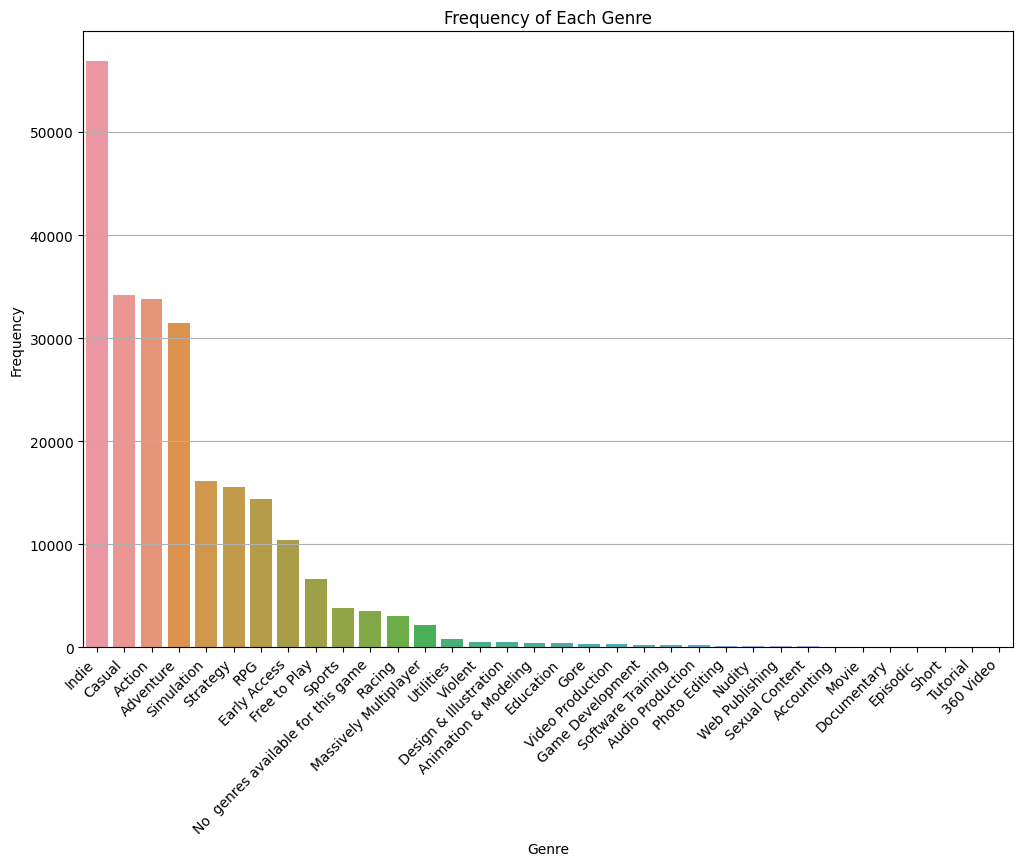

In [27]:

plt.figure(figsize=(12, 8))
sns.barplot(x='Genre', y='Frequency', data=genre_counts)
plt.title('Frequency of Each Genre')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate genre labels for better readability
plt.grid(axis='y')
plt.show()


In [28]:
data.to_csv('games.csv')